<a href="https://colab.research.google.com/github/vidheeshnacode/SM/blob/master/TS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [ ]:
df = pd.read_csv('TSLA.csv')

#set the index
df= df.set_index(pd.DatetimeIndex(df['Date'].values))


df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-19,2019-08-19,224.210007,227.830002,221.699997,226.830002,226.830002,5309600
2019-08-20,2019-08-20,227.619995,229.089996,224.539993,225.860001,225.860001,4125200
2019-08-21,2019-08-21,222.009995,223.220001,217.600006,220.830002,220.830002,7794300
2019-08-22,2019-08-22,222.800003,225.399994,218.220001,222.149994,222.149994,6559000
2019-08-23,2019-08-23,219.970001,221.169998,211.000000,211.399994,211.399994,8538600
...,...,...,...,...,...,...,...
2020-08-10,2020-08-10,1448.000000,1457.500000,1385.839966,1418.569946,1418.569946,7522300
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800
2020-08-13,2020-08-13,1611.000000,1651.180054,1567.260010,1621.000000,1621.000000,20425300


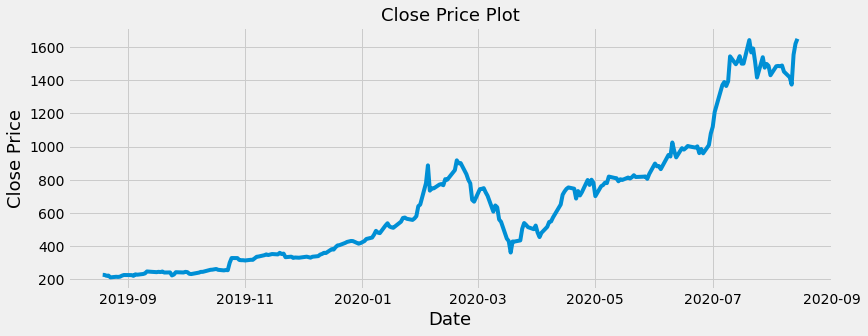

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.title('Close Price Plot', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)

plt.show()


In [ ]:
#Short/Fast exonential moving average

# 20 , 50, 200 moving average days

ShortEMA = df.Close.ewm(span =5, adjust = False).mean()

#Middle/Medium Exponential Average
MiddleEMA = df.Close.ewm(span = 21, adjust = False).mean()

#Long/Slow exponential moving average
LongEMA = df.Close.ewm(span = 63, adjust = False).mean()


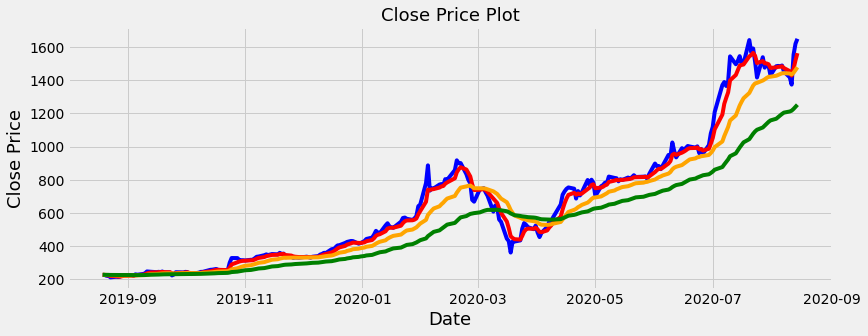

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.title('Close Price Plot', fontsize = 18)
plt.plot(df['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short EMA', color = 'red')
plt.plot(MiddleEMA,  label = 'Middle EMA', color = 'orange')
plt.plot(LongEMA,  label = 'Long EMA', color = 'Green')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)

plt.show()

In [ ]:
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2019-08-19,2019-08-19,224.210007,227.830002,221.699997,226.830002,226.830002,5309600,226.830002,226.830002,226.830002
2019-08-20,2019-08-20,227.619995,229.089996,224.539993,225.860001,225.860001,4125200,226.506668,226.741820,226.799689
2019-08-21,2019-08-21,222.009995,223.220001,217.600006,220.830002,220.830002,7794300,224.614446,226.204382,226.613137
2019-08-22,2019-08-22,222.800003,225.399994,218.220001,222.149994,222.149994,6559000,223.792962,225.835801,226.473664
2019-08-23,2019-08-23,219.970001,221.169998,211.000000,211.399994,211.399994,8538600,219.661973,224.523455,226.002611
...,...,...,...,...,...,...,...,...,...,...
2020-08-10,2020-08-10,1448.000000,1457.500000,1385.839966,1418.569946,1418.569946,7522300,1455.605315,1441.168170,1212.038762
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800,1428.533548,1435.097429,1217.112239
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800,1470.609035,1445.975845,1227.663732
2020-08-13,2020-08-13,1611.000000,1651.180054,1567.260010,1621.000000,1621.000000,20425300,1520.739357,1461.887132,1239.955490


In [ ]:
#Trading stategy function
def buy_sell(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False

    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False

    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)




In [ ]:
df['Buy'] = buy_sell(df)[0]
df['Sell'] = buy_sell(df)[1]

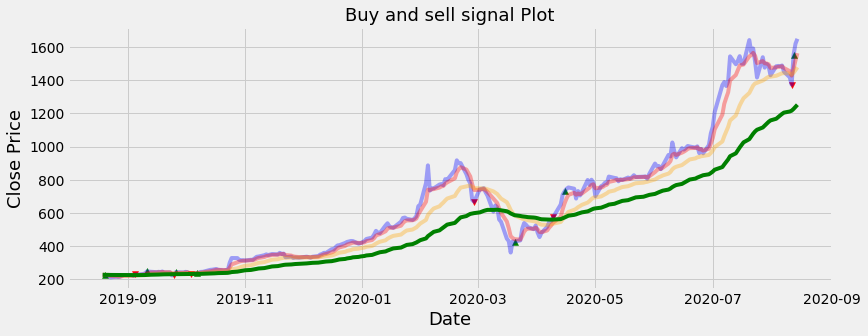

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.title('Buy and sell signal Plot', fontsize = 18)
plt.plot(df['Close'], label = 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short EMA', color = 'red', alpha = 0.35)
plt.plot(MiddleEMA,  label = 'Middle EMA', color = 'orange', alpha = 0.35)
plt.plot(LongEMA,  label = 'Long EMA', color = 'Green')
plt.scatter(df.index, df['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)

plt.show()